## Project Objective
The objective of this project is to analyze mobile phone usage patterns to identify indicators of phone addiction. By leveraging Python for data cleaning, visualization, and statistical analysis, the project aims to uncover behavioral insights such as excessive screen time, app usage trends, and time-of-day usage. The ultimate goal is to support awareness and potential interventions to reduce unhealthy phone usage habits.

Source:https://github.com/TatobaPadhare33/Phone-Addiction-Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import plotly.express as px
import os

import statistics as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [2]:
# read file using pandas....pd.read_csv("file_name")
df=pd.read_csv("phone_addiction.csv")
df

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,High_Addiction,Bed_ScreenTime_Ratio
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,19,3.6,1.7,1.2,Browsing,4,8.7,10.0,True,0.350000
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,9,1.1,4.0,1.8,Browsing,2,5.3,10.0,True,0.163636
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,8,0.3,1.5,0.4,Education,6,5.7,9.2,True,0.086207
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,7,3.1,1.6,0.8,Social Media,8,3.0,9.8,True,0.451613
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,20,2.6,0.9,1.1,Gaming,10,3.7,8.6,True,0.400000
5,6,Mary Adams,13,Female,East Angelachester,10th,3.9,6.3,89,3,...,8,3.8,0.0,1.4,Social Media,7,6.0,8.8,True,0.282051
6,7,Hailey Moses,16,Male,North Jeffrey,11th,6.3,6.7,89,3,...,9,1.8,2.7,1.0,Education,7,7.8,10.0,True,0.126984
7,8,Veronica Marshall,13,Other,Jenniferport,10th,5.1,6.1,70,2,...,7,2.3,1.6,0.5,Browsing,9,8.0,8.0,True,0.196078
8,9,Edward Avila,13,Male,Leebury,8th,3.0,9.1,79,0,...,13,2.7,2.2,1.3,Education,10,9.1,7.3,True,0.300000
9,10,James Carter,18,Other,Prestonview,11th,3.9,5.8,89,8,...,13,2.7,0.4,1.0,Other,9,2.9,9.1,True,0.230769


In [52]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [53]:
df.tail()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0
2999,3000,Curtis Johnson,17,Male,Lake Alexander,10th,3.5,6.9,79,4,...,0.6,117,8,0.0,2.3,0.1,Education,7,5.1,6.3


In [54]:
df.shape

(3000, 25)

In [7]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [55]:
#taking sample
#start : Stop
df.iloc[15:30]

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
15,16,Gregory Hughes,19,Other,Port Charles,11th,4.4,6.6,97,6,...,1.2,134,17,2.2,1.5,1.8,Education,4,6.8,10.0
16,17,Matthew Webb,15,Female,Lake Chase,8th,5.4,7.8,87,4,...,0.9,36,20,2.6,1.3,1.1,Gaming,9,1.4,10.0
17,18,John Cooper,15,Other,Paulstad,10th,3.0,6.1,80,5,...,1.2,95,16,3.0,1.9,0.2,Other,7,7.5,10.0
18,19,Amy Greene,19,Female,Port Nicholasberg,9th,7.9,8.5,96,6,...,1.0,58,9,2.2,1.9,1.3,Education,5,3.5,10.0
19,20,Kathryn Perez,18,Male,South Thomas,12th,5.4,5.9,69,4,...,0.6,83,19,1.6,1.0,0.4,Browsing,7,6.1,10.0
20,21,Michael Williams,15,Female,Margaretmouth,12th,3.0,5.1,83,4,...,1.5,58,6,1.7,1.7,2.0,Social Media,8,6.7,6.2
21,22,Patricia Johnson,16,Female,North Scott,12th,2.7,6.3,92,3,...,1.7,112,17,2.1,2.6,0.9,Gaming,10,5.7,9.9
22,23,Jennifer Davis,14,Other,Port Angelabury,11th,2.7,5.1,60,9,...,1.7,117,16,2.5,1.3,0.2,Education,5,4.8,9.5
23,24,Desiree Brady,19,Male,East Amanda,9th,6.9,3.6,79,5,...,0.8,32,7,2.0,1.3,1.2,Education,7,6.6,10.0
24,25,Mark Crawford,19,Other,Port Alan,12th,4.6,7.2,85,7,...,1.1,71,5,1.8,0.8,1.1,Social Media,8,6.2,6.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [56]:
display (df.apply(lambda x: len(x.unique())))
# here we are fidning each column has unique values and objects

ID                        3000
Name                      2933
Age                          7
Gender                       3
Location                  2726
School_Grade                 6
Daily_Usage_Hours          107
Sleep_Hours                 71
Academic_Performance        51
Social_Interactions         11
Exercise_Hours              39
Anxiety_Level               10
Depression_Level            10
Self_Esteem                 10
Parental_Control             2
Screen_Time_Before_Bed      27
Phone_Checks_Per_Day       131
Apps_Used_Daily             16
Time_on_Social_Media        51
Time_on_Gaming              41
Time_on_Education           31
Phone_Usage_Purpose          5
Family_Communication        10
Weekend_Usage_Hours        120
Addiction_Level             80
dtype: int64

In [12]:
df.isnull()
# checking for null values

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
df.isnull().sum()
# checking for null values

ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

In [58]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()
# satatstics data description

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


# Data Cleaning & Preparation

In [61]:
# Drop rows with missing data for simplicity
df = df.dropna()

# Convert Gender to category type for efficiency
df["Gender"] = df["Gender"].astype("category")

In [22]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


# sample data 1

In [62]:
df1=df.iloc[0:50]
df1

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
5,6,Mary Adams,13,Female,East Angelachester,10th,3.9,6.3,89,3,...,1.1,135,8,3.8,0.0,1.4,Social Media,7,6.0,8.8
6,7,Hailey Moses,16,Male,North Jeffrey,11th,6.3,6.7,89,3,...,0.8,129,9,1.8,2.7,1.0,Education,7,7.8,10.0
7,8,Veronica Marshall,13,Other,Jenniferport,10th,5.1,6.1,70,2,...,1.0,34,7,2.3,1.6,0.5,Browsing,9,8.0,8.0
8,9,Edward Avila,13,Male,Leebury,8th,3.0,9.1,79,0,...,0.9,70,13,2.7,2.2,1.3,Education,10,9.1,7.3
9,10,James Carter,18,Other,Prestonview,11th,3.9,5.8,89,8,...,0.9,121,13,2.7,0.4,1.0,Other,9,2.9,9.1


# Exploratory Data Analysis

<Axes: >

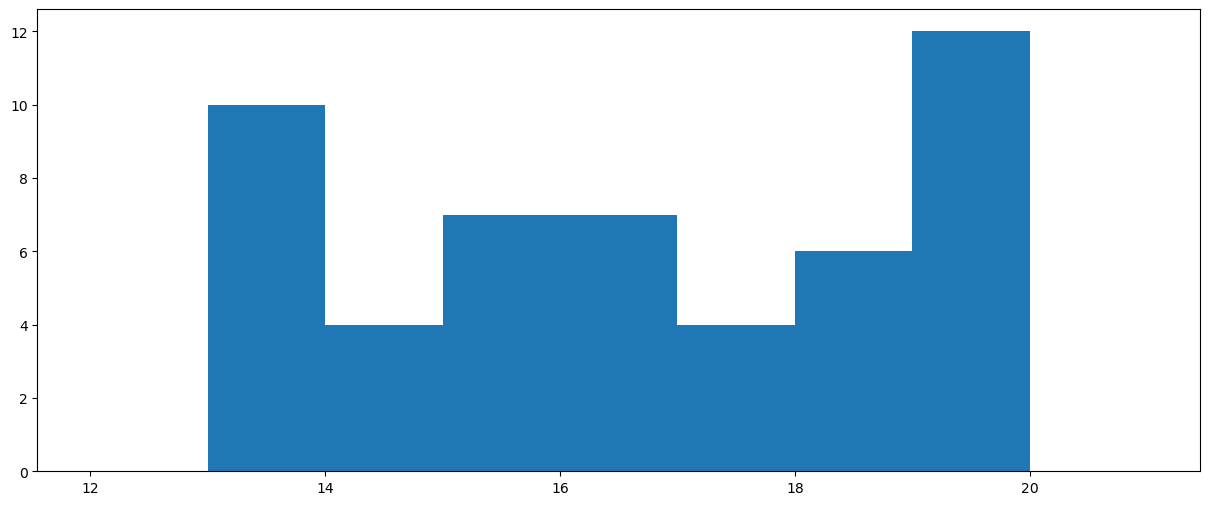

In [63]:
# Demographic Distributions
df1['Age'].hist(bins=range(12, 22), 
               grid=False)

<Axes: >

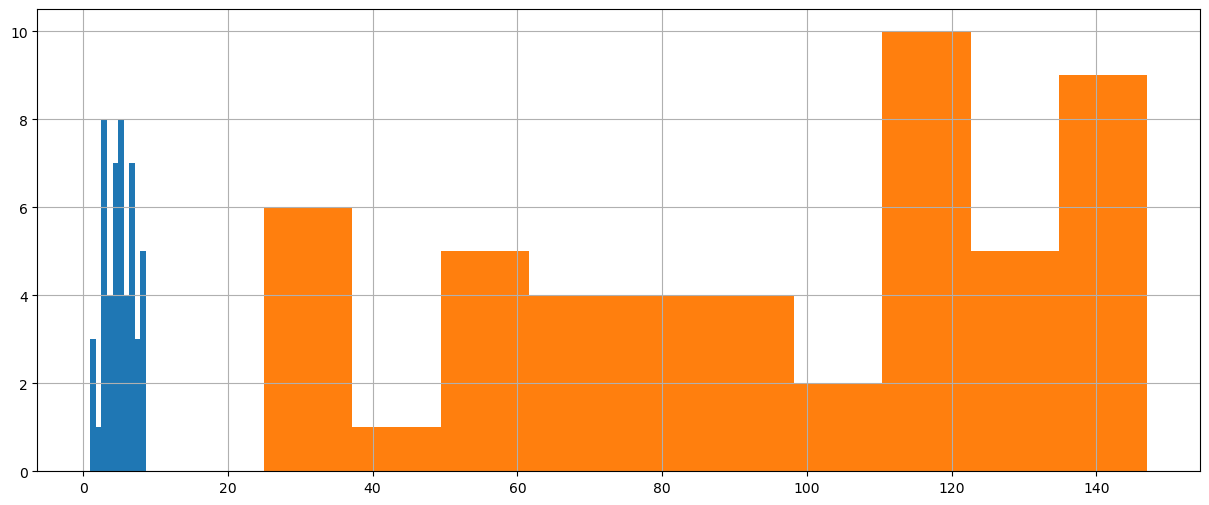

In [64]:
# Phone Use Patterns
df1['Daily_Usage_Hours'].hist()
df1['Phone_Checks_Per_Day'].hist()

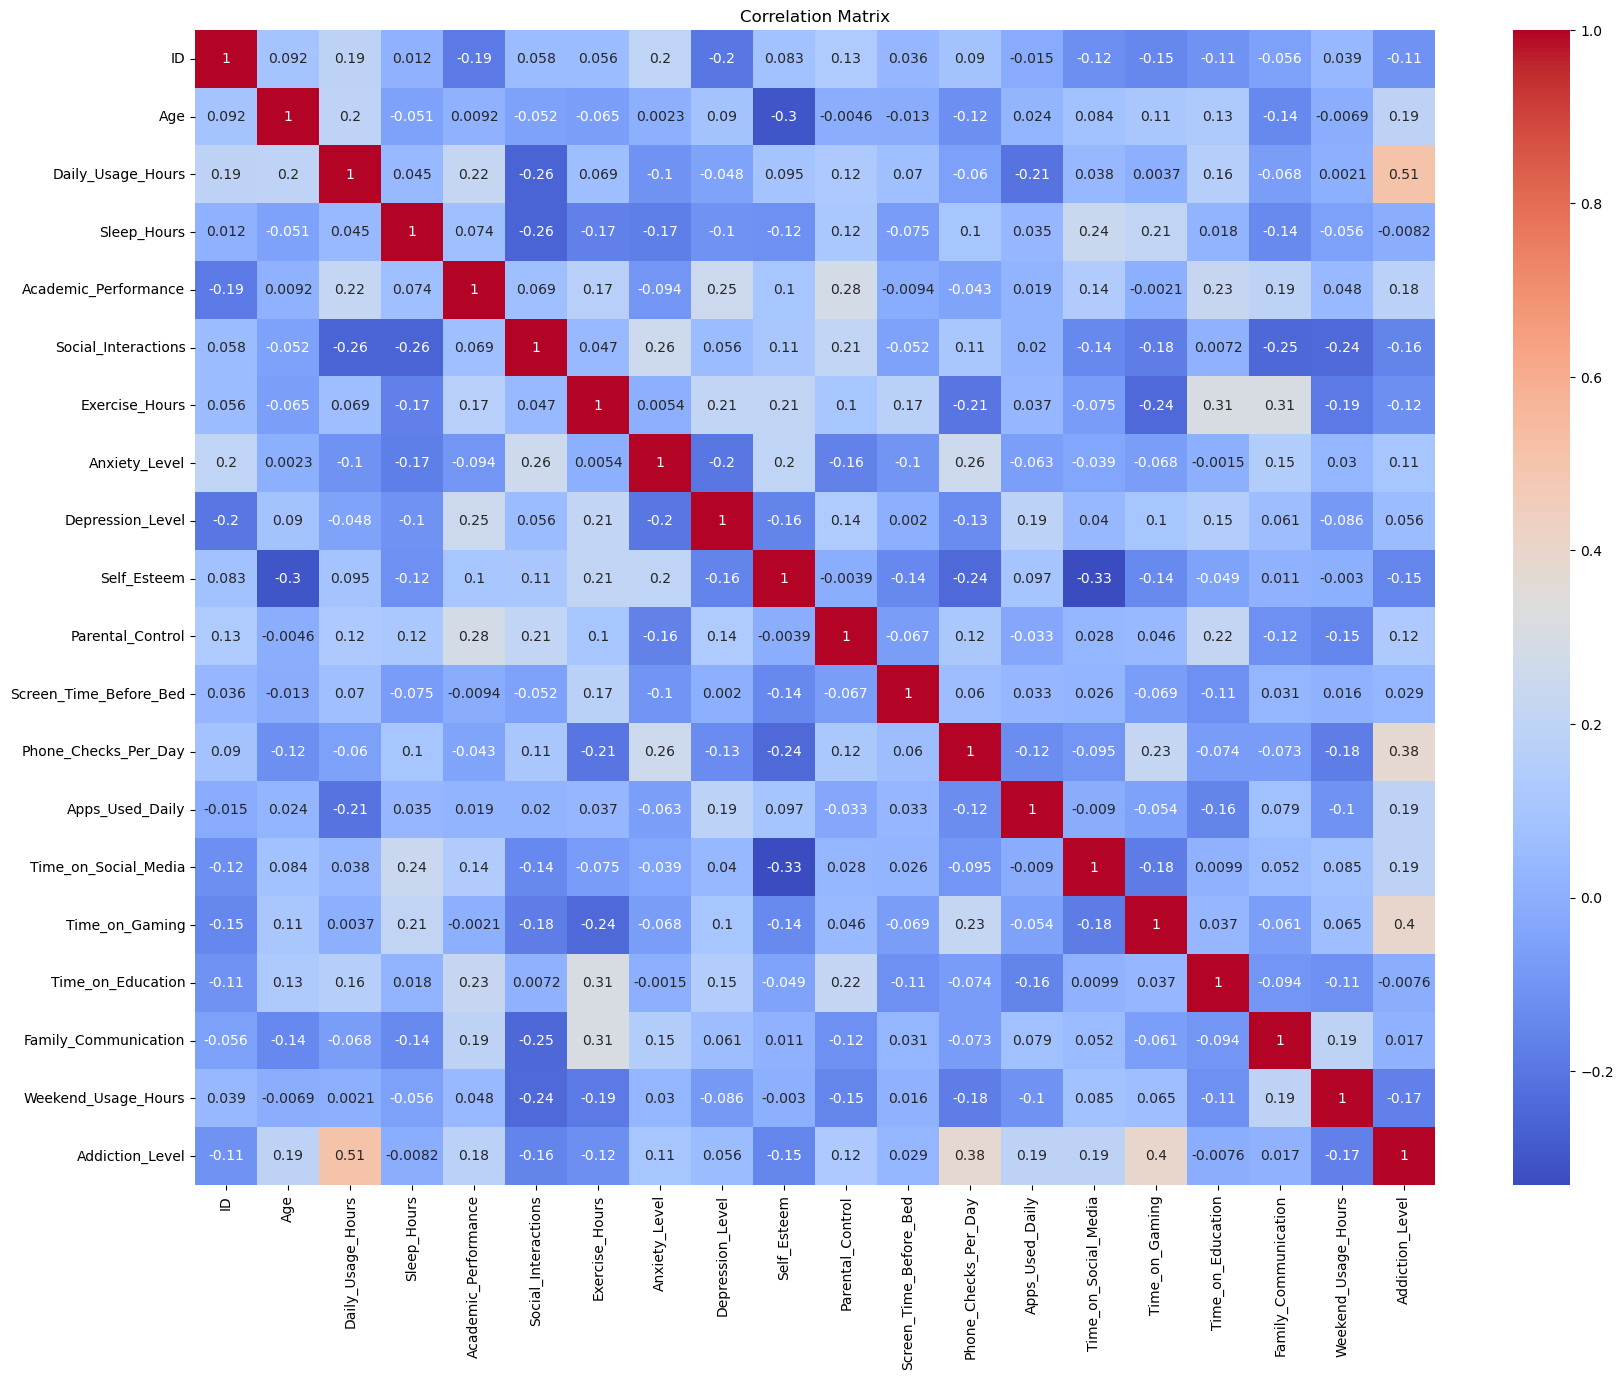

In [65]:
# Relationship Matrix :Visualize correlations between all numerical fields
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

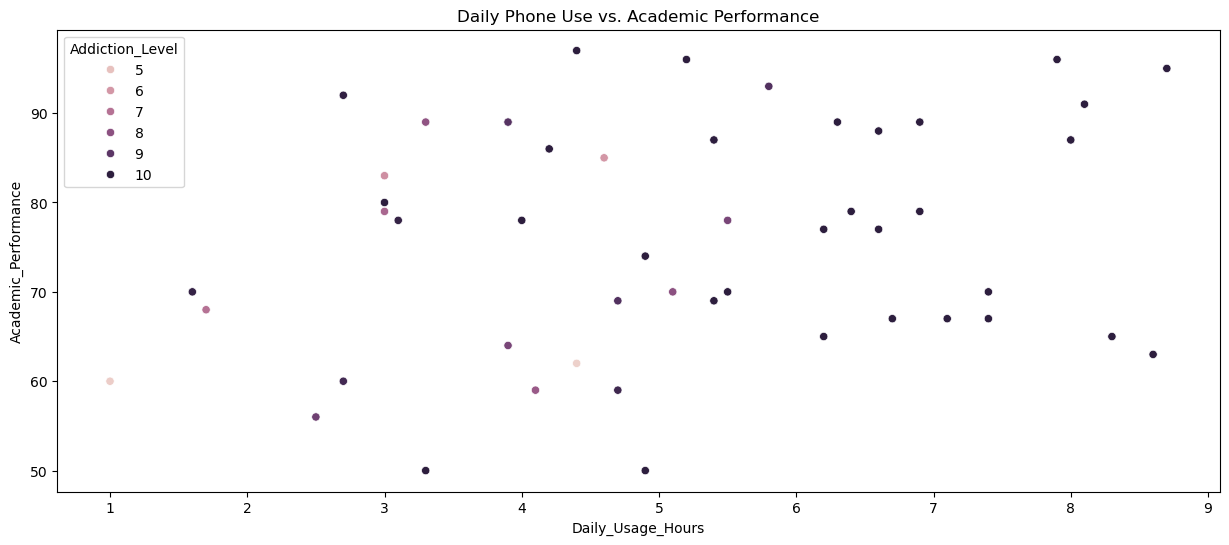

In [66]:
# Phone Use vs Academic Performance
sns.scatterplot(x='Daily_Usage_Hours', y='Academic_Performance', data=df1, hue='Addiction_Level')
plt.title("Daily Phone Use vs. Academic Performance")
plt.show()

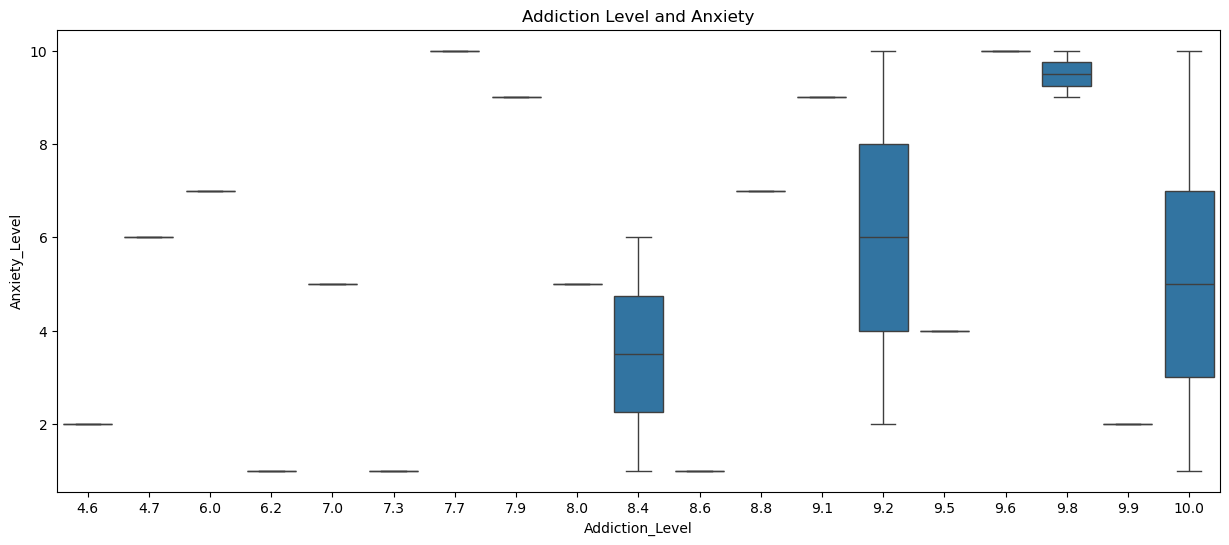

In [67]:
# Addiction vs Mental Health
sns.boxplot(x='Addiction_Level', y='Anxiety_Level', data=df1)
plt.title("Addiction Level and Anxiety")
plt.show()

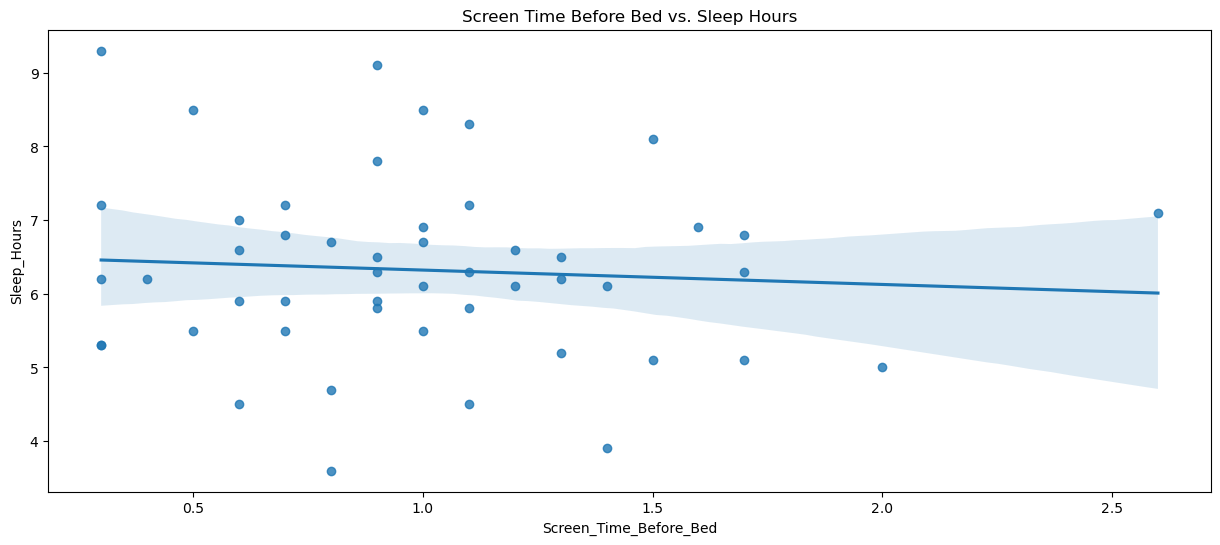

In [68]:
# Sleep Deprivation
sns.regplot(x='Screen_Time_Before_Bed', y='Sleep_Hours', data=df1)
plt.title("Screen Time Before Bed vs. Sleep Hours")
plt.show()

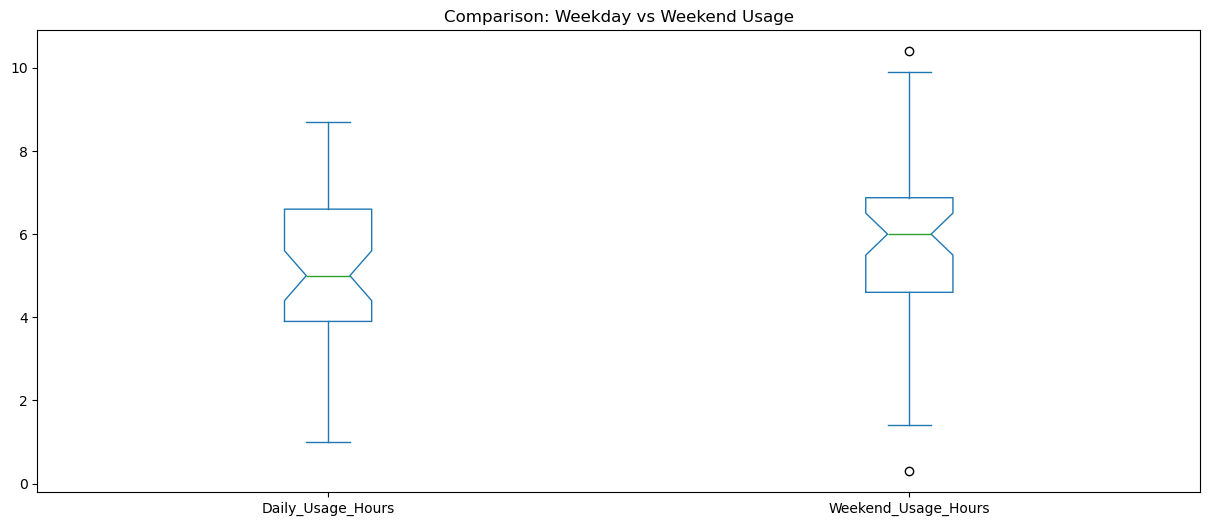

In [69]:
# Weekday vs Weekend Usage
df1[['Daily_Usage_Hours', 'Weekend_Usage_Hours']].plot(kind='box', notch=True)
plt.title("Comparison: Weekday vs Weekend Usage")
plt.show()

In [70]:
# Flag high addiction
df1["High_Addiction"] = df1["Addiction_Level"] > 7

In [71]:
# Ratio of screen time before bed to daily usage
df1["Bed_ScreenTime_Ratio"] = df1["Screen_Time_Before_Bed"] / df1["Daily_Usage_Hours"]

# Predictive Modeling 

In [73]:
# Predict high phone addiction risk from behavioral features.
X = df1[['Daily_Usage_Hours', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Screen_Time_Before_Bed',
        'Time_on_Social_Media', 'Time_on_Gaming', 'Sleep_Hours', 'Academic_Performance']]
y = df1['High_Addiction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.80      1.00      0.89         8

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10



# Data Export

In [77]:
#  Save your cleaned and enriched data.
df1.to_csv("phone_addiction.csv", index=False)

### Conclusion
This project explored the patterns and impacts of phone usage among individuals, focusing on its correlation with mental health, academic performance, and sleep habits. Through data preprocessing, exploratory data analysis, and predictive modeling, we identified key behavioral indicators contributing to phone addiction.

Notable findings include:

High screen time before bed is a strong indicator of potential addiction.

There are observable links between excessive phone use and lower academic performance.

Mental health indicators such as anxiety and sleep deprivation correlate with higher usage.

The final model flags individuals at high risk of phone addiction based on their digital behavior, providing a foundation for early intervention strategies. This study highlights the importance of digital wellness and offers actionable insights for educators, healthcare professionals, and app developers.

Source:https://github.com/TatobaPadhare33/Phone-Addiction-Analysis